In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import math
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm
from datetime import datetime
from matplotlib.lines import Line2D

## Process Data

In [2]:
# Import Data
df = pd.read_csv("shogi_data.csv")
df["color"] = df["result"].apply(lambda x: "#34a853" if x == "W" else "#ea4335")
df["people_color"] = df["opponent"].apply(lambda x: '#f62196' if x == "Kaden" else "#ffe46b" if x == "Dhruv" else "#b7b7b7")
df["int_date"] = df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().toordinal())
df["endgame_percentage"] = (df["total"] - df["endgame"]) / df["total"]
df["midgame_percentage"] = (df["endgame"] - df["midgame"]) / df["total"]
df["opening_percentage"] = df["midgame"] / df["total"]
df["midgame_length"] = df["endgame"] - df["midgame"]
df["centipawn_difference"] = -(df["my_centipawn"] / df["opp_centipawn"]).apply(lambda x: math.log(x))
df.dropna(inplace=True)
display(df)

,platform,date,opponent,time,result,my_centipawn,opp_centipawn,midgame,endgame,total,color,people_color,int_date,endgame_percentage,midgame_percentage,opening_percentage,midgame_length,centipawn_difference
0,LiShogi,2024-04-12,Kaden,15|30,L,213,152,53,56,161,#ea4335,#f62196,738988,0.652174,0.018634,0.329193,3,-0.337412
1,LiShogi,2024-05-02,Kaden,15|30,L,623,417,31,47,57,#ea4335,#f62196,739008,0.175439,0.280702,0.543860,16,-0.401460
2,LiShogi,2024-05-02,Kaden,15|30,W,321,522,27,47,55,#34a853,#f62196,739008,0.145455,0.363636,0.490909,20,0.486226
3,LiShogi,2024-05-04,Kaden,15|30,W,289,449,24,45,76,#34a853,#f62196,739010,0.407895,0.276316,0.315789,21,0.440596
4,LiShogi,2024-05-04,Kaden,15|30,W,256,428,37,57,63,#34a853,#f62196,739010,0.095238,0.317460,0.587302,20,0.513946
5,LiShogi,2024-05-04,Kaden,15|30,L,161,41,32,52,94,#ea4335,#f62196,739010,0.446809,0.212766,0.340426,20,-1.367832
6,LiShogi,2024-05-05,Kaden,15|30,L,363,211,39,65,85,#ea4335,#f62196,739011,0.235294,0.305882,0.458824,26,-0.542545
7,LiShogi,2024-05-05,Kaden,15|30,L,180,46,26,34,80,#ea4335,#f62196,739011,0.575000,0.100000,0.325000,8,-1.364315
8,LiShogi,2024-05-10,Kaden,15|30,L,585,463,35,62,84,#ea4335,#f62196,739016,0.261905,0.321429,0.416667,27,-0.233885
9,LiShogi,2024-05-10,Kaden,15|30,W,257,371,23,51,84,#34a853,#f62196,739016,0.392857,0.333333,0.273810,28,0.367126


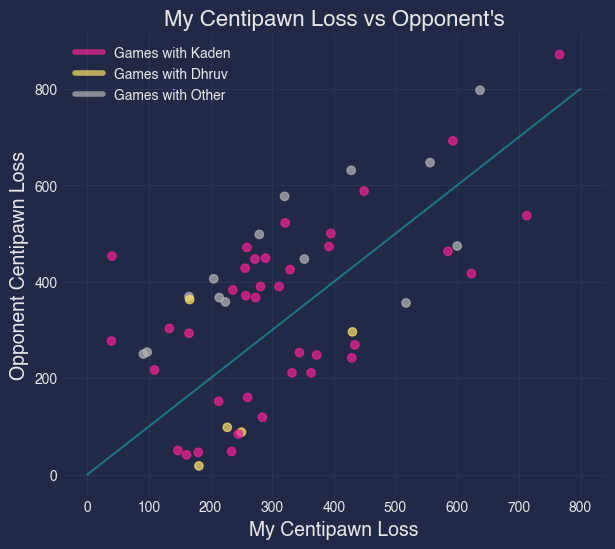

In [3]:
# Create Fig and gridspec
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")
plt.figure(figsize=(7, 6))
# plt.scatter(df["midgame_percentage"], df["centipawn_difference"], c = df["people_color"], alpha=0.7)
plt.scatter(df["my_centipawn"], df["opp_centipawn"], c = df["people_color"], alpha=0.7)
# plt.axhline(0, color='#18c0c4', alpha=0.5)

x_line = [0,800]
y_line = [0,800]
plt.plot(x_line,y_line, color='#18c0c4', alpha=0.5)

win_legend_elements = [Line2D([0], [0], color='#34a853', alpha=0.7, lw=4, label='Win'),
                   Line2D([0], [0], color='#ea4335', alpha=0.7, lw=4, label='Loss')]

legend_elements = [Line2D([0], [0], color='#f62196', alpha=0.7, lw=4, label='Games with Kaden'),
                   Line2D([0], [0], color='#ffe46b', alpha=0.7, lw=4, label='Games with Dhruv'),
                   Line2D([0], [0], color='#b7b7b7', alpha=0.7, lw=4, label='Games with Other')]

plt.legend(handles=legend_elements)
# Decorations
plt.title('My Centipawn Loss vs Opponent\'s', fontsize=16)
plt.xlabel('My Centipawn Loss', fontsize=14)
plt.ylabel('Opponent Centipawn Loss', fontsize=14)

# plt.savefig("shogi.png")
plt.show()